<a href="https://colab.research.google.com/github/patty-13/MSML-603-UMD-MACHINE-LEARNING/blob/main/Extra_Credit_Project_119344675_PRATYUSH_SETHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optional Extra Credit Project (200 points)
In this project you should use thetraining data generated below to build a classifier based on a decison trees algorithm. **You cannot use the available libraries like Scikit Learn**. Please make sure that your code 



1.   classifies the given training data based on the decsion tree we discussed in the class. You should use the entropy  loss function.
2.    uses bagging to reduce the variance of the classifier.
1.   plots the desion regions
2.  plots the training data and the decision boundaries on a single plot

**To get the credit for this HW your code needs to be functional and clear.** 


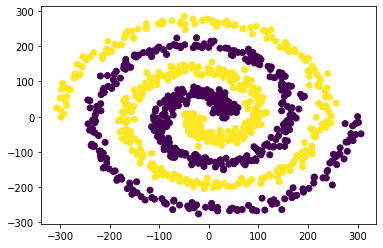

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from matplotlib import pyplot
from tqdm import tqdm

def gen_spiral(N, NS, sigma):
  theta = np.linspace(0, NS*2*np.pi, int(N/2))
  r = np.linspace(30, 300, int(N/2))
  X = np.array([r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
                r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )])
  Y = np.zeros(int(N/2), dtype ='int16')
  
  temp = np.array([-r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
                -r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )+3]) 

  X = np.hstack((X, temp))
  Y = np.append(Y, np.ones(int(N/2), dtype ='int16'))
  index =np.arange(len(Y))
  np.random.shuffle(index)
  X = X[:,index]
  Y = Y[index]
  plt.scatter(X[0,:], X[1,:], c = Y)
  
  return X, Y


X, Y = gen_spiral(1000, 2, 10)

In [ ]:

# ######################### FLOW OF CODE ############################
# DEFINE NODE : WHERE THE INFORMATION WILL BE STORED.
# DEFINE CLASSIFIER: WILL BUILD AND CLASSIFY THE DATA
# DEFINE BAGGING : WILL HELP IN LOWER OF THE VARIANCE
# DEFINE DRIVER CODE: WILL RUN THE PROGRAM
######################### TRAINING ##################################
# Split feature
# Split point
# When to stop spliting
#######
# Calculate potential splits and and entropy with each possible split
# Divide set with features and value that gives most entropy
# divide tree and create branches until stopping critiera is reached.
####################### TESTING ####################################
# Recursively follow the tree until you reach leaf node.
# or if its not pure return majoristy of the labels in nodes

NODE CLASS

In [ ]:
# ALL the information required to build a tree is saved in nodes.
# REFERRED THE CODE FROM TUTORIAL POINT AND OTHER REFERENCE.
class Node:
  def __init__(self, feature=None, threshold=None,left_data=None, right_data=None, *,value=None):
    self.feature = feature
    self.threshold = threshold
    self.left_data = left_data
    self.right_data = right_data
    self.value = value

MAIN CLASS DECISION TREE CLASSIFIER

In [ ]:
class decision_Tree_classifier:

  def __init__(self, min_samples = 2, max_depth = None):
    self.min_samples = min_samples
    self.max_depth = max_depth

  '''
  Check lable, if pure or all belong to same class will return true
  else will return false.
  '''
  ### MY PART
  def check_label(self,data):

    if len(np.unique(data[:,-1])) == 1:
      return True
    else:
      return False
  
  '''
  classify the label and return label class
  '''

  def classify(self,data):

    n_class, count_class = np.unique(data[:,-1], return_counts = True)
    index = count_class.argmax()
    classification = n_class[index]
    return classification

  '''
  Return total entropy of the left and right leaf nodes.
  '''
  # ENTROPY ## MY PART
  ########################################################################################################
  def entropy(self,left_data, right_data):
    
    prob_left_data = len(left_data) / (len(left_data) + len(right_data))
    prob_right_data = len(right_data) / (len(left_data) + len(right_data))
    
    # left node entropy
    _, left_labels = np.unique(left_data[:,-1] , return_counts = True)
    entropy_left = sum((left_labels / left_labels.sum())*-np.log2(left_labels / left_labels.sum()))
    
    # Right node entropy
    _, right_labels = np.unique(right_data[:,-1] , return_counts= True)
    entropy_right = sum((right_labels / right_labels.sum())*-np.log2(right_labels / right_labels.sum()))

    # Total entropy
    total_entropy = ((prob_left_data)*(entropy_left) + (prob_right_data)*(entropy_right) )
  
    return total_entropy
  ###########################################################################################################
  '''
  Returns potential splits 
  '''
  ### MY PART
  def splits(self,data):

    p_splits = {}
    _, n_col = data.shape
    for col_index in range(n_col-1):
      p_splits[col_index] = np.unique(data[:,col_index])
    return p_splits


  def split_data(self,data, split_col, split_val):

    left_data = data[data[:,split_col] <= split_val]
    right_data = data[data[:,split_col] > split_val]
    return left_data, right_data

  ##########################################################################
  # Refered best_split
  def best_split(self,data, p_splits):

    total_entropy = 9999
    for col_i in p_splits:
      for va in p_splits[col_i]:
        left_data = data[data[:,col_i] <= va]
        right_data = data[data[:,col_i] > va]
        split_entropy = self.entropy(left_data, right_data)

        if split_entropy <= total_entropy:
          total_entropy = split_entropy
          best_split_col = col_i
          best_split_val = va
    return best_split_col, best_split_val
  

  '''
  PREDICTOR FUNCTION
  '''
  ###########################################################################
  # DIRECTLY USED Predictor function
  def predict_tree(self,tree,X):
    return np.array([self.traverse_tree(x, tree) for x in X])

  def traverse_tree(self,x, node):
    if node.value != None:
      return node.value
    
    if x[node.feature] <= node.threshold:
      return self.traverse_tree(x, node.left_data)
    else:
      return self.traverse_tree(x, node.right_data)
  
  '''
  FIT FUNCITON
  '''
  #### MY PART
  def fit_tree(self,data,counter =0, min_samples = 2, max_depth = None):

    # STOPPING CRITERIA TO STOP ON THREE CONDITIONS
    # 1. IF THE LABLES ARE PURE
    # 2. DATA IS SMALLE
    # 3. HAVE REACHED THE MAX_DEPTH OR THE LEAF_NODES IN EACH ITERATION
    if(self.check_label(data)) or (len(data)< min_samples) or (counter == max_depth):
      classification = self.classify(data)
      return Node(value = classification)

    else:
      counter +=1
      p_splits = self.splits(data)
      split_col, split_val = self.best_split(data, p_splits)
      left_data, right_data = self.split_data(data, split_col, split_val)

    # CHECKING IF LENGTH OF LEFT OR RIGHT  DATA IS ALREADY ZERO, THEN NO NEED FOR
    # RECURSION-> CLASSIFY
      if len(left_data) == 0 or len(right_data) ==0:
        classification = self.classify(X)
        return classification

    # RECURSIVE ITERATION 
      left = self.fit_tree(left_data, counter, min_samples, max_depth)
      right = self.fit_tree(right_data, counter, min_samples, max_depth)

      return Node(split_col, split_val, left, right)
    



BAGGING CLASS

In [ ]:
class Bagging:
  # Refered structure and how to generate random data Rest code is mine.
  def bagged_train(self, x_train, y_train, tree,min_size =2, max_depth =None):
    # Iterating over N_tree models
    self.tree_models = []
    model = decision_Tree_classifier()

    for i in range(0, tree):
      # Random sampling of the data.
      sample = np.random.choice(x_train.shape[0], size = y_train.size, replace = True)
      x_s = x_train[sample]
      y_s = y_train[sample]
      df = pd.DataFrame({'Coord_X':x_s[:,0],'coord_y':x_s[:,1],'Labels': y_s})
      data = df.values
      # fitting the model on decision tree classifier
      tree = model.fit_tree(data)
      self.tree_models.append(tree)
    return self.tree_models

  # Aggregating the predictions
  def bagged_predict(self, tree_models, x_test, tree):
    self.y_pred = []
    model = decision_Tree_classifier()
    y_pred = np.zeros(len(x_test))
    for i in range(0,len(self.tree_models)):
      y_pred = y_pred + model.predict_tree(tree_models[i],x_test)
    return np.round(y_pred/tree)

 # printing accuracy for each individual model tree.
  def accuracy(self,y_pred,y_test):
     accuracy = ( y_pred == y_test).sum() / float(len(y_test))*100
     return accuracy

TRAIN TEST SPLIT FUNCTION

In [ ]:
# Function to split the dataset into train test set.
# LEARNED TO SPLIT THE DATA FROM YOUR ASSIGNMENTS.
def train_test_split(X, Y, n_samples ,split_ratio):
  X1 = X.T
  N_tr = int(n_samples*split_ratio)
  N_tst = n_samples - N_tr
  X_train = X1[0:N_tr]
  Y_train = Y[0:N_tr]
  X_test =  X1[N_tr:]
  Y_test =  Y[N_tr:]
  return X_train, Y_train, X_test, Y_test

DRIVER CODE

In [ ]:
#################################### DRIVER CODE #######################################
# Splitting the dataset in train and test sets 
# MY PART (FOR DRIVER CODE)
x_train, y_train, x_test, y_test = train_test_split(X,Y, n_samples = 1000 ,split_ratio = 0.80)

# Number of trees we want bagging for
N_tree = [1,5,10,50]

# calling bagging class.
bag = Bagging()

# Iterating over to check accuarcy of the trees.
for i in tqdm(range(len(N_tree))):

  print("Tree:",N_tree[i])
  # Trainging the models
  T = bag.bagged_train(x_train,y_train,N_tree[i])
  
  # Predicting the models
  y_pred = bag.bagged_predict(T, x_test,N_tree[i])

  # printing the accuracy
  acc = bag.accuracy(y_pred,y_test)
  print("avg accuracy is:",acc)



  0%|          | 0/4 [00:00<?, ?it/s]

Tree: 1


 25%|██▌       | 1/4 [00:01<00:03,  1.30s/it]

avg accuracy is: 94.0
Tree: 5


 50%|█████     | 2/4 [00:06<00:07,  3.78s/it]

avg accuracy is: 95.0
Tree: 10


 75%|███████▌  | 3/4 [00:18<00:07,  7.40s/it]

avg accuracy is: 96.5
Tree: 50


100%|██████████| 4/4 [01:16<00:00, 19.01s/it]

avg accuracy is: 96.5


PLOT DECISION REGIONS

Note: it takes around 3 minutes for the plot to show up.

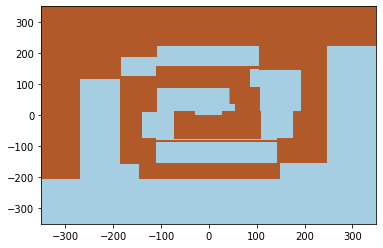

In [ ]:
## DIRECTLY USED FOR PLOTTING FROM MACHINE LEARNING MASTERY TO PLOT CONTOUR OR DECISION BOUNDARY.
# define bounds of the domain

min1, max1 =  -350.0,  350.0
min2, max2 =  -350.0,  350.0

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

######################################################################
# define the model                      (MY PART) FOR CALLING
Bag1 = Bagging()
T1 = Bag1.bagged_train(x_train, y_train, tree = 1)
y_pred_1 = Bag1.bagged_predict(T1, grid, tree = 1)
#####################################################################

# reshape the predictions back into a grid
zz = np.reshape(y_pred_1, xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz,cmap='Paired')

PLOT OF DECISION REGIONS WITH TRAINING DATA FOR N_TREE = 1 OR CAN BE CONSIDERED WITHOUT BAGGING 

Note: it takes around 3 minutes for the plot to show up.

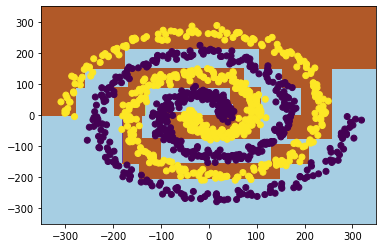

In [ ]:

# define bounds of the domain

min1, max1 =  -350.0,  350.0
min2, max2 =  -350.0,  350.0

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# define the model
########################################################################
# HERE WE CAN CHANGE THE NUMBER OF TREES USING 1,5,10,50
Bag1 = Bagging()
T1 = Bag1.bagged_train(x_train, y_train,tree = 1)
y_pred_1 = Bag1.bagged_predict(T1, grid, tree = 1)
#######################################################################

# reshape the predictions back into a grid
zz = np.reshape(y_pred_1, xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for samples from each class
N = 1000
NS = 2
sigma = 10
theta = np.linspace(0, NS*2*np.pi, int(N/2))
r = np.linspace(30, 300, int(N/2))
X = np.array([r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
            r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )])
Y = np.zeros(int(N/2), dtype ='int16')
  
temp = np.array([-r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
                -r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )+3]) 

X = np.hstack((X, temp))
Y = np.append(Y, np.ones(int(N/2), dtype ='int16'))
index =np.arange(len(Y))
np.random.shuffle(index)
X = X[:,index]
Y = Y[index]
plt.scatter(X[0,:], X[1,:], c = Y)
pyplot.show()

PLOT OF DECISION REGIONS WITH TRAINING DATA FOR N_TREE = 10

Note: it takes around 23 minutes to run plot for decision regions for N_tree = 10. More trees take time, but reduces variance

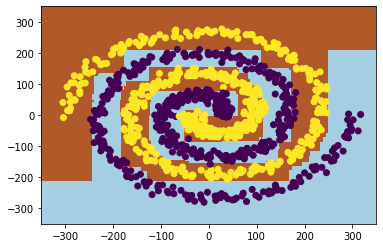

In [ ]:

# define bounds of the domain

min1, max1 =  -350.0,  350.0
min2, max2 =  -350.0,  350.0

# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# define the model
########################################################################
# HERE WE CAN CHANGE THE NUMBER OF TREES USING 1,5,10,50
Bag1 = Bagging()
T1 = Bag1.bagged_train(x_train, y_train,tree = 10)
y_pred_1 = Bag1.bagged_predict(T1, grid, tree = 10)
########################################################################

# reshape the predictions back into a grid
zz = np.reshape(y_pred_1, xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for samples from each class
N = 1000
NS = 2
sigma = 10
theta = np.linspace(0, NS*2*np.pi, int(N/2))
r = np.linspace(30, 300, int(N/2))
X = np.array([r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
            r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )])
Y = np.zeros(int(N/2), dtype ='int16')
  
temp = np.array([-r*np.cos(theta)+ sigma* np.random.normal(0,1, int(N/2)), 
                -r*np.sin(theta)+ sigma* np.random.normal(0,1, int(N/2) )+3]) 

X = np.hstack((X, temp))
Y = np.append(Y, np.ones(int(N/2), dtype ='int16'))
index =np.arange(len(Y))
np.random.shuffle(index)
X = X[:,index]
Y = Y[index]
plt.scatter(X[0,:], X[1,:], c = Y)
pyplot.show()

REFERENCE:[PLOTTING CONTOUR](https://machinelearningmastery.com/plot-a-decision-surface-for-machine-learning/)
<BR>CODE STRUCTURE REFERENCE: https://betterdatascience.com/mml-decision-trees/ <BR> Bagging strucutre: https://dafriedman97.github.io/mlbook/content/c6/s2/bagging.html<br> TREE DATA STRUCTURE: https://www.tutorialspoint.com/python_data_structure/python_binary_tree.htm<br> I USED CODE STRUCTURE REFERENCE, to build the code, there are three comments one is reffered, one is  directly used and third is My part(coded by me or worked by me). The directly used are code used with a little to no change, referred parts are the parts recoded and restructured according to use case for the code.
Rest the organization of code of decision tree  classifier and bagging is referred and not directly copied.